In [5]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

In [6]:
csv_file = "/Users/louis/Desktop/we_fn_use_c_marketing_customer_value_analysis.csv"
data = pd.read_csv(csv_file)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
data.drop(columns="Customer",inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [10]:
#get cat and num values

categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)



print("Dataframe of numerical columns: ")
print()

display(numericals)

print("Dataframe of categorical columns: ")
print()

display(categoricals)

Dataframe of numerical columns: 



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Dataframe of categorical columns: 



,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [11]:
data = pd.concat([numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
print("The dataset size is: ", data.shape)
print()
data

NameError: name 'cat_encoded' is not defined

In [12]:
cat_encoded = pd.get_dummies(categoricals, drop_first=True)
cat_encoded.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Effective To Date_1/10/11,Effective To Date_1/11/11,Effective To Date_1/12/11,Effective To Date_1/13/11,Effective To Date_1/14/11,Effective To Date_1/15/11,Effective To Date_1/16/11,Effective To Date_1/17/11,Effective To Date_1/18/11,Effective To Date_1/19/11,Effective To Date_1/2/11,Effective To Date_1/20/11,Effective To Date_1/21/11,Effective To Date_1/22/11,Effective To Date_1/23/11,Effective To Date_1/24/11,Effective To Date_1/25/11,Effective To Date_1/26/11,Effective To Date_1/27/11,Effective To Date_1/28/11,Effective To Date_1/29/11,Effective To Date_1/3/11,Effective To Date_1/30/11,Effective To Date_1/31/11,Effective To Date_1/4/11,Effective To Date_1/5/11,Effective To Date_1/6/11,Effective To Date_1/7/11,Effective To Date_1/8/11,Effective To Date_1/9/11,Effective To Date_2/1/11,Effective To Date_2/10/11,Effective To Date_2/11/11,Effective To Date_2/12/11,Effective To Date_2/13/11,Effective To Date_2/14/11,Effective To Date_2/15/11,Effective To Date_2/16/11,Effective To Date_2/17/11,Effective To Date_2/18/11,Effective To Date_2/19/11,Effective To Date_2/2/11,Effective To Date_2/20/11,Effective To Date_2/21/11,Effective To Date_2/22/11,Effective To Date_2/23/11,Effective To Date_2/24/11,Effective To Date_2/25/11,Effective To Date_2/26/11,Effective To Date_2/27/11,Effective To Date_2/28/11,Effective To Date_2/3/11,Effective To Date_2/4/11,Effective To Date_2/5/11,Effective To Date_2/6/11,Effective To Date_2/7/11,Effective To Date_2/8/11,Effective To Date_2/9/11,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
data1 = pd.concat([numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
print("The dataset size is: ", data1.shape)
print()
data1

The dataset size is:  (9134, 109)



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Effective To Date_1/10/11,Effective To Date_1/11/11,Effective To Date_1/12/11,Effective To Date_1/13/11,Effective To Date_1/14/11,Effective To Date_1/15/11,Effective To Date_1/16/11,Effective To Date_1/17/11,Effective To Date_1/18/11,Effective To Date_1/19/11,Effective To Date_1/2/11,Effective To Date_1/20/11,Effective To Date_1/21/11,Effective To Date_1/22/11,Effective To Date_1/23/11,Effective To Date_1/24/11,Effective To Date_1/25/11,Effective To Date_1/26/11,Effective To Date_1/27/11,Effective To Date_1/28/11,Effective To Date_1/29/11,Effective To Date_1/3/11,Effective To Date_1/30/11,Effective To Date_1/31/11,Effective To Date_1/4/11,Effective To Date_1/5/11,Effective To Date_1/6/11,Effective To Date_1/7/11,Effective To Date_1/8/11,Effective To Date_1/9/11,Effective To Date_2/1/11,Effective To Date_2/10/11,Effective To Date_2/11/11,Effective To Date_2/12/11,Effective To Date_2/13/11,Effective To Date_2/14/11,Effective To Date_2/15/11,Effective To Date_2/16/11,Effective To Date_2/17/11,Effective To Date_2/18/11,Effective To Date_2/19/11,Effective To Date_2/2/11,Effective To Date_2/20/11,Effective To Date_2/21/11,Effective To Date_2/22/11,Effective To Date_2/23/11,Effective To Date_2/24/11,Effective To Date_2/25/11,Effective To Date_2/26/11,Effective To Date_2/27/11,Effective To Date_2/28/11,Effective To Date_2/3/11,Effective To Date_2/4/11,Effective To Date_2/5/11,Effective To Date_2/6/11,Effective To Date_2/7/11,Effective To Date_2/8/11,Effective To Date_2/9/11,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,384.811147
1,6979.535903,0,94,13,42,0,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1131.464935
2,12887.431650,48767,108,18,38,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,566.472247
3,7645.861827,0,106,18,65,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,529.881344
4,2813.692575,43836,73,12,44,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [14]:
data1.columns.tolist()

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'State_California',
 'State_Nevada',
 'State_Oregon',
 'State_Washington',
 'Response_Yes',
 'Coverage_Extended',
 'Coverage_Premium',
 'Education_College',
 'Education_Doctor',
 'Education_High School or Below',
 'Education_Master',
 'Effective To Date_1/10/11',
 'Effective To Date_1/11/11',
 'Effective To Date_1/12/11',
 'Effective To Date_1/13/11',
 'Effective To Date_1/14/11',
 'Effective To Date_1/15/11',
 'Effective To Date_1/16/11',
 'Effective To Date_1/17/11',
 'Effective To Date_1/18/11',
 'Effective To Date_1/19/11',
 'Effective To Date_1/2/11',
 'Effective To Date_1/20/11',
 'Effective To Date_1/21/11',
 'Effective To Date_1/22/11',
 'Effective To Date_1/23/11',
 'Effective To Date_1/24/11',
 'Effective To Date_1/25/11',
 'Effective To Date_1/26/11',
 'Effective To Date_1/27/11',
 'Effective To Da

In [15]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(data1.iloc[:,:-1])
x_standardized = transformer.transform(data1.iloc[:,:-1])

In [16]:
data1_standardized = pd.DataFrame(x_standardized,columns=data1.columns.tolist()[:-1])
data1_standardized.head()
X = data1_standardized
y = data1['Total Claim Amount']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [19]:
#check with KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [20]:
knn_predictions = knn_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 154.05
The mean squared error of the model in the test set is: 51434.97
The root mean squared error of the model in the test set is: 226.79
The R2 of the model in the test set is: 0.36


In [22]:
#check with linear regression
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)

In [23]:
lm_predictions = lm_model.predict(X_test)

In [24]:
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)
# 6= number of number before coma, 2= after the coma 
print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  95.10
The mean squared error of the model in the test set is: 17993.52
The root mean squared error of the model in the test set is: 134.14
The R2 of the model in the test set is: 0.77


# LAB 2

In [25]:
#Get numerical 
numericals = data.select_dtypes(np.number)



print("Dataframe of numerical columns: ")
print()

display(numericals)

Dataframe of numerical columns: 



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [26]:
#Check using a distribution plot if the variables fit the 
# theoretical normal or exponential distribution.
import seaborn as sns 

sns.set(color_codes=True)

sns.set(rc={'figure.figsize':(5,5)})


In [31]:
from scipy.stats import uniform

n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

In [ ]:
ax = sns.distplot(data_uniform,
                 bins=100
                 kde=True,
                 color='skyblue',hist_kws={'linewidth':15,'alpha':1})
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

In [27]:
from scipy import stats 

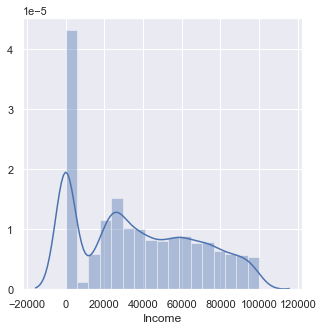

In [28]:
sns.distplot(numericals['Income'])

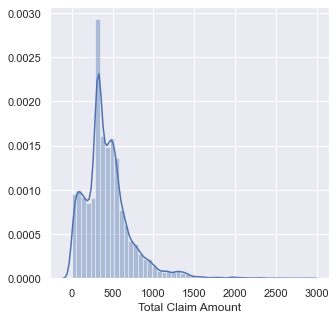

In [29]:
sns.distplot(numericals['Total Claim Amount'])

Customer Lifetime Value
NormaltestResult(statistic=6056.610837197603, pvalue=0.0)


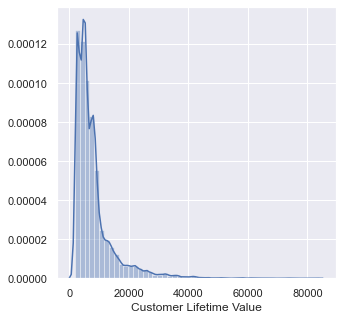

Income
NormaltestResult(statistic=3720.2700450095704, pvalue=0.0)


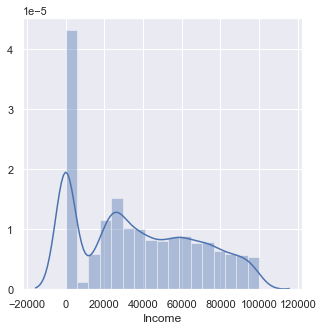

Monthly Premium Auto
NormaltestResult(statistic=4064.7177759080087, pvalue=0.0)


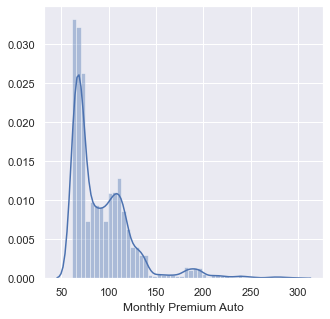

Months Since Last Claim
NormaltestResult(statistic=3281.4715424209667, pvalue=0.0)


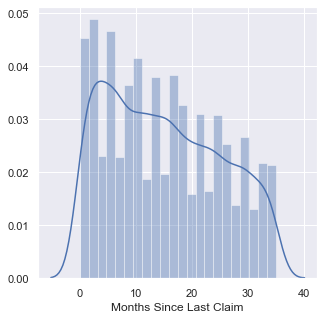

Months Since Policy Inception
NormaltestResult(statistic=4660.4460619394495, pvalue=0.0)


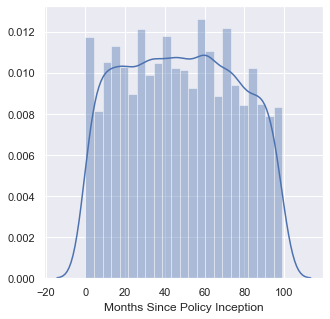

Number of Open Complaints
NormaltestResult(statistic=5201.268702364348, pvalue=0.0)


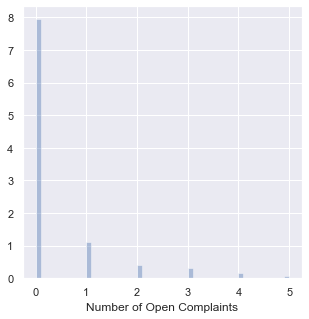

Number of Policies
NormaltestResult(statistic=1535.7435390522583, pvalue=0.0)


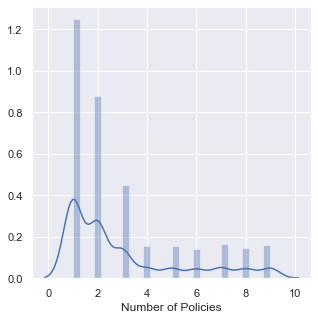

Total Claim Amount
NormaltestResult(statistic=3401.5977104443095, pvalue=0.0)


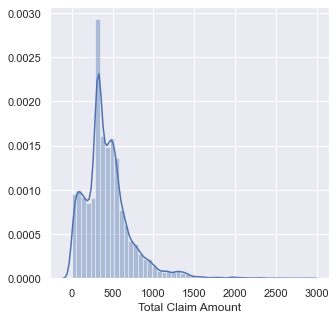

In [30]:


for i in numericals.columns:
    print(i)
    print(stats.normaltest(numericals[i])) #to get p-value 
    ptinz(stats.ttest_ind(numericals[i], data_uniform)[1])
    sns.distplot(numericals[i])
    plt.show()